# **Feature Engineering**

## Objectives

* Balance out the data using SMOTE.
* Perform feature engineering to prepare the data for the machine learning model.

## Inputs

* mountains_vs_beaches_preferences.csv is the raw data - collected in the 01_Data_Collection notebook.

## Outputs

* A CSV file containing the balanced data with the engineered features.

## Additional Comments

* Please select Python 3.8.18 for the kernel of this notebook.
* This notebook was inspired by the Churnometer walkthrough project.
* Feature Engineering operations are inspired by Orhan Serçe - under this link: https://www.kaggle.com/code/orhansere/mountains-vs-beaches-smote-classification



In [2]:
import os
import pandas as pd

home_dir = "/workspace/DestinationDNA"
csv_dir = "outputs/datasets/raw"
csv_file = "mountains_vs_beaches_preferences.csv"
os.chdir(home_dir)
current_dir = os.getcwd()
print(current_dir)
df = pd.read_csv(f"{csv_dir}/{csv_file}")

/workspace/DestinationDNA


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [4]:
#People who likes fall or winter and likes beaches.
cold_bea = df[(df['Favorite_Season'].eq('fall')) | (df['Favorite_Season'].eq('winter')) & df['Preference'].eq('beaches')]

cold_beach = cold_bea.shape[0] - (df[df['Favorite_Season'].eq('fall')].shape[0] / 2)


#People who likes fall or winter and likes mountains.
cold_mount = df[(df['Favorite_Season'].eq('fall')) | (df['Favorite_Season'].eq('winter')) & df['Preference'].eq('mountains')]

cold_mountain = cold_mount.shape[0] - (df[df['Favorite_Season'].eq('fall')].shape[0] / 2)


#People who likes spring or summer and likes beaches.
warm_bea = df[(df['Favorite_Season'].eq('spring')) | (df['Favorite_Season'].eq('summer')) & df['Preference'].eq('beaches')]

warm_beach = warm_bea.shape[0] - (df[df['Favorite_Season'].eq('spring')].shape[0] / 2)



#People who likes spring or summer and likes mountains.
warm_mount = df[(df['Favorite_Season'].eq('spring')) | (df['Favorite_Season'].eq('summer')) & df['Preference'].eq('mountains')]

warm_mountain = warm_mount.shape[0] - (df[df['Favorite_Season'].eq('spring')].shape[0] / 2)

In [5]:
heheh = warm_beach + warm_mountain + cold_mountain + cold_beach

print(df.shape[0], heheh)

52444 26122.0


In [6]:
from prettytable import PrettyTable 

table = PrettyTable(['Preferences', 'Like cold', 'Like warm']) 
    
    
table.add_row(['Like Beach', cold_beach, warm_beach], divider=True)
table.add_row(['Like Mountain', cold_mountain, warm_mountain]) 


table.align['Preferences'] = 'l'

    
print(table)


print('Hence the name pretty table! Worth it :)')

+---------------+-----------+-----------+
| Preferences   | Like cold | Like warm |
+---------------+-----------+-----------+
| Like Beach    |   6585.0  |   6476.0  |
+---------------+-----------+-----------+
| Like Mountain |   6585.0  |   6476.0  |
+---------------+-----------+-----------+
Hence the name pretty table! Worth it :)


In [7]:
df["AgeGroup"] = pd.cut(x=df['Age'], bins=[0,30,45,60,111], labels=["Noob","Intermediate","Pro", 'Veteran'])
df['AgeGroup'] = df['AgeGroup'].astype('object')
df['AgeGroup'].value_counts()

Intermediate    15370
Pro             14909
Noob            13009
Veteran          9156
Name: AgeGroup, dtype: int64

<Figure size 800x600 with 0 Axes>

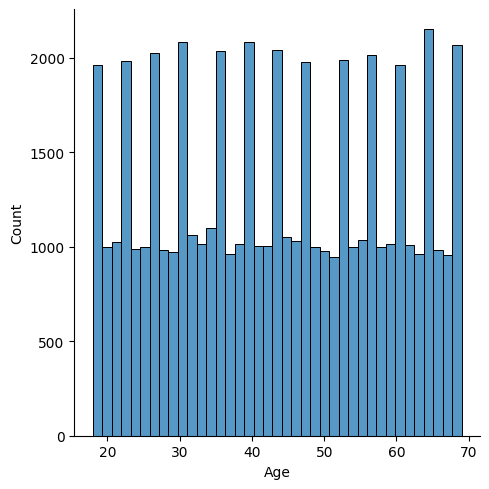

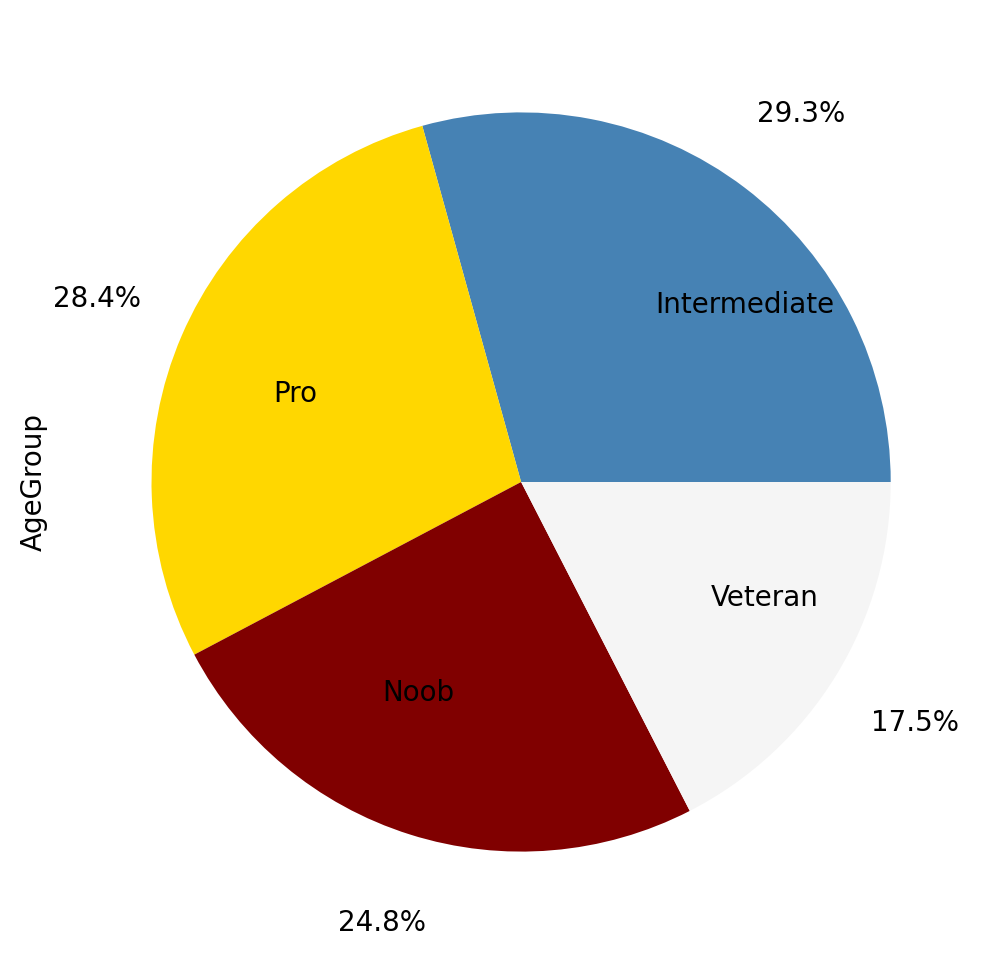

In [8]:
plt.figure(figsize=(4, 3), dpi=200)
sns.displot(data=df, x='Age')
plt.show()



plt.figure(figsize=(4, 3), dpi=200)
df['AgeGroup'].value_counts().plot(kind='pie', stacked=True, colors=['steelblue', 'gold', 'maroon', 'whitesmoke'], figsize=(9,6), autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6)
plt.show()

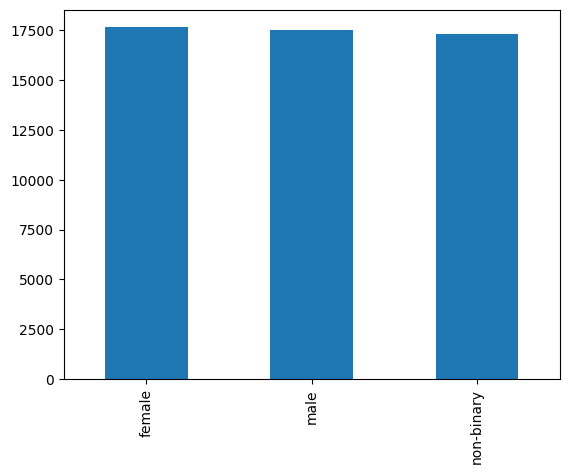

In [9]:

df['Gender'].value_counts().plot(kind='bar')
plt.show()

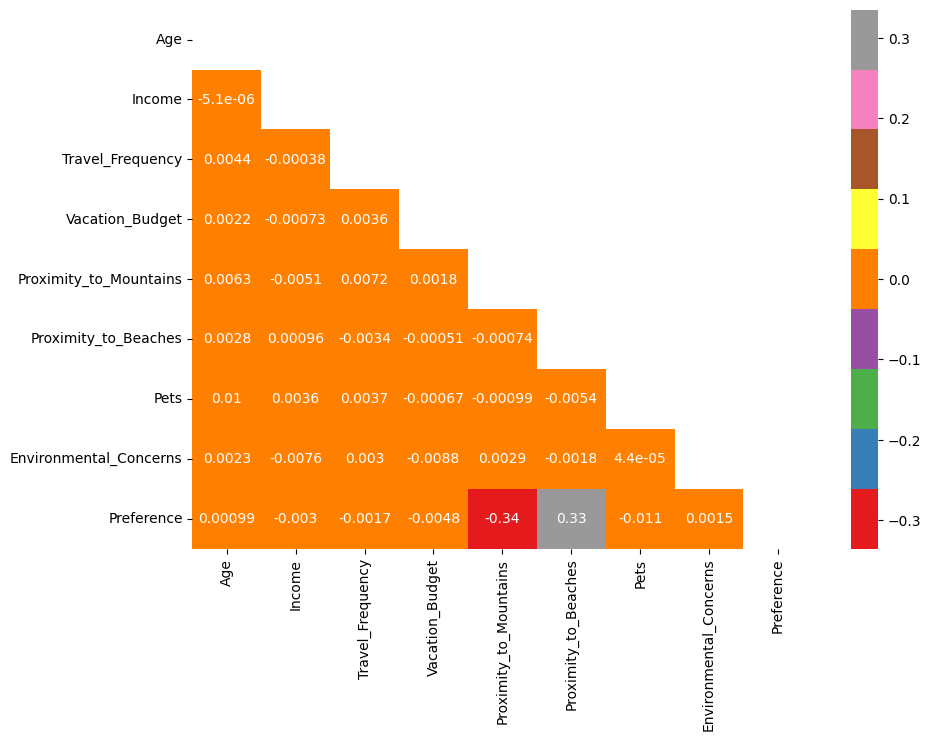

In [10]:
corr = df.corr(numeric_only=True)
mask = np.triu(corr)

plt.figure(figsize=(10, 7))

sns.heatmap(corr, annot=True, cmap="Set1", mask=mask)

plt.show()

In [11]:
df = df.drop('Age', axis=1)

In [13]:
labne = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = labne.fit_transform(df[col])

df

,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,AgeGroup
0,1,71477,0,9,1,2477,2,175,267,2,0,1,1,2
1,1,88740,3,1,3,4777,1,228,190,0,0,1,0,3
2,0,46562,3,0,1,1469,2,71,280,3,0,0,1,2
3,2,99044,2,6,0,1482,0,31,255,2,1,0,1,0
4,0,106583,2,5,2,516,1,23,151,3,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,0,85325,3,3,0,1762,1,51,262,0,1,0,1,3
52440,0,110346,0,7,3,1676,2,259,84,1,1,0,0,0
52441,2,71080,1,7,3,3877,2,164,27,0,0,1,0,2
52442,0,75174,1,9,3,4620,1,173,10,2,0,1,0,0


In [14]:
scaler = StandardScaler()

for col in df.columns:
    if df[col].dtype == 'int':
        df[col] = labne.fit_transform(df[col])

df

,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference,AgeGroup
0,1,21032,0,9,1,1977,2,175,267,2,0,1,1,2
1,1,28207,3,1,3,4277,1,228,190,0,0,1,0,3
2,0,10861,3,0,1,969,2,71,280,3,0,0,1,2
3,2,32425,2,6,0,982,0,31,255,2,1,0,1,0
4,0,35511,2,5,2,16,1,23,151,3,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,0,26800,3,3,0,1262,1,51,262,0,1,0,1,3
52440,0,37071,0,7,3,1176,2,259,84,1,1,0,0,0
52441,2,20862,1,7,3,3377,2,164,27,0,0,1,0,2
52442,0,22597,1,9,3,4120,1,173,10,2,0,1,0,0


In [15]:
X = df.drop('Preference', axis=1)
y = df['Preference']

In [16]:
sm = SMOTE(random_state=717)
X_sm, y_sm = sm.fit_resample(X, y)

In [17]:
print(y.value_counts())
print('-------------------')
print('-------------------')
print(y_sm.value_counts())

0    39296
1    13148
Name: Preference, dtype: int64
-------------------
-------------------
1    39296
0    39296
Name: Preference, dtype: int64


In [18]:
print(X.shape)
print('-------------------')
print('-------------------')
print(X_sm.shape)

(52444, 13)
-------------------
-------------------
(78592, 13)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=717)

In [20]:
def tatata(model):
    
    model.fit(X_train, y_train)
    
    predx = model.predict(X_test)
    
    print(classification_report(y_test, predx))

    cm = confusion_matrix(y_test, predx)

    dist = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    dist.plot()
    plt.show()


/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.91      0.91      0.91      9802
           1       0.91      0.91      0.91      9846

    accuracy                           0.91     19648
   macro avg       0.91      0.91      0.91     19648
weighted avg       0.91      0.91      0.91     19648



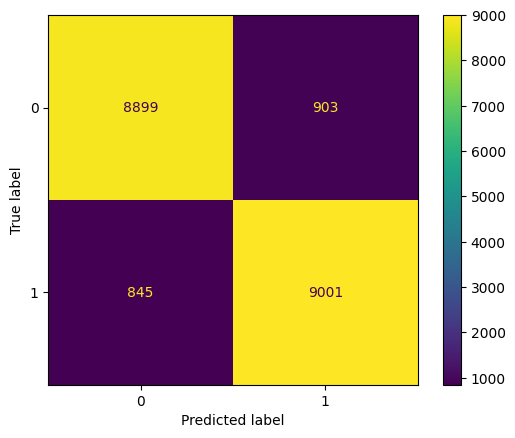

In [21]:
model = LogisticRegression()

tatata(model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9802
           1       1.00      1.00      1.00      9846

    accuracy                           1.00     19648
   macro avg       1.00      1.00      1.00     19648
weighted avg       1.00      1.00      1.00     19648



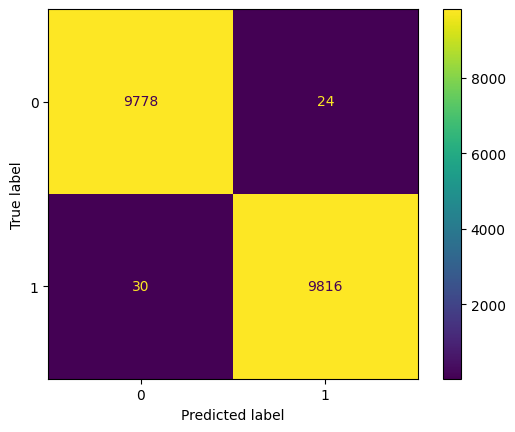

In [22]:
model = DecisionTreeClassifier()

tatata(model)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9802
           1       0.99      1.00      0.99      9846

    accuracy                           0.99     19648
   macro avg       0.99      0.99      0.99     19648
weighted avg       0.99      0.99      0.99     19648



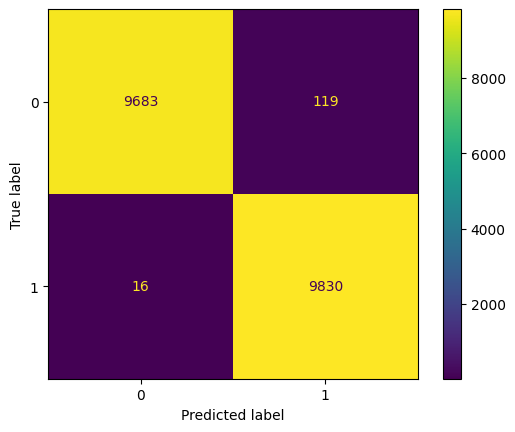

In [23]:
model = GradientBoostingClassifier()

tatata(model)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      9802
           1       0.93      0.94      0.94      9846

    accuracy                           0.94     19648
   macro avg       0.94      0.94      0.94     19648
weighted avg       0.94      0.94      0.94     19648



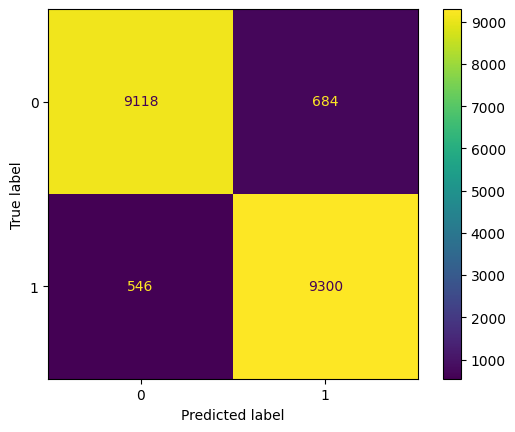

In [24]:
model = GaussianNB()

tatata(model)

In [26]:
output_file = "outputs/datasets/processed/balanced_mountains_vs_beaches_preferences.csv"
df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")


Data saved to outputs/datasets/processed/balanced_mountains_vs_beaches_preferences.csv


---